In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [2]:
def rk4_simultaneous(f, r0, t):
    # n is the number of equations
    n = len(r0)
    
    # N is the number of grid points
    N = len(t)
    
    # Step size
    h = (t[-1] - t[0]) / N
    
    # Setup r. Each row takes the form (xi, yi), etc
    r = np.zeros((len(t) ,len(r0)))
    r[0] = r0 # Change zeroth row to initial condition
        
    # RK4 algorithm
    for i in range(0, N-1):
        k1 = h * f(r[i],  t[i])
        k2 = h * f(r[i] + 0.5*k1, t[i] + 0.5*h)
        k3 = h * f(r[i] + 0.5*k2, t[i] + 0.5*h)
        k4 = h * f(r[i] + k3, t[i] + h)
        r[i+1] = r[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        
    return r.T

# Second-order ordinary differential equations

Most differential equations in physics are usually in second-order. We consider first a 2nd-order ODE with one dependent variable
\
\
    $$\frac{d^2 x}{d t^2} = f \left(x, \frac{dx}{dt}, t\right)$$
\
\
We define a new quantity 
\
\
    $$\frac{dx}{dt} = y$$
\
\
So that 
    $$\frac{dy}{dt} = f(x,y,t)$$
\
\
This process reduces the problem into a pair of 1st-order ODEs.

# Equation of motion of a 1D Harmonic oscillator

According to classical physics we can model the displacement of a mass attached to a spring using Newton's second law,
\
\
    $$m\ddot{x}  = -k x \qquad \Rightarrow \qquad \ddot{x} = -\omega_0^2 x$$
\
\
We can set $\omega_0 = k/m$ (angular frequency). We will then be solving the system:
\
\
    $$\frac{dx}{dt} = y, \qquad \frac{dy}{dt} = -\omega_0^2 x$$

<IPython.core.display.Javascript object>


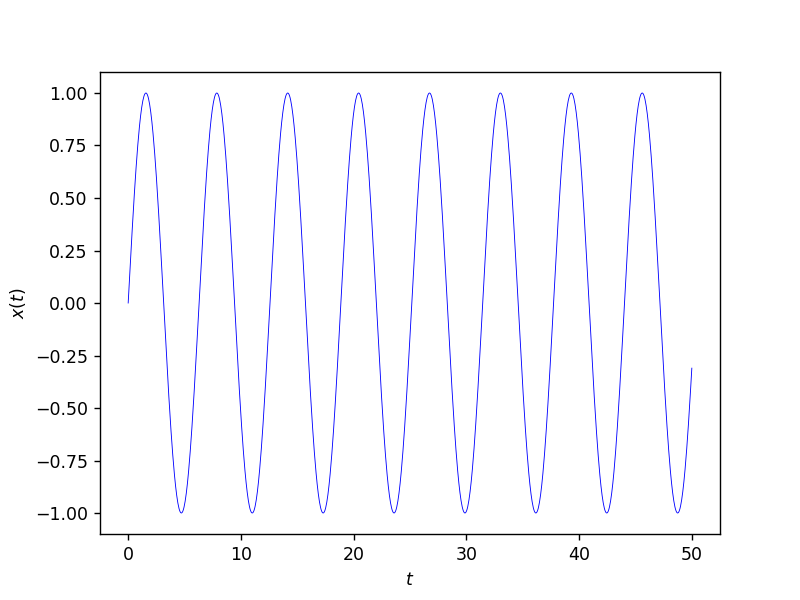

Text(0, 0.5, '$x(t)$')

In [3]:
ω0 = 1

def f(r, t):
    x = r[0]
    y = r[1]
    fx = y
    fy = - ω0**2 * x
    
    return np.array([fx,fy])

tmin = 0
tmax = 50
N = 1000
t = np.linspace(tmin, tmax, N)

r0 = [0,1] # [initial position, initial velocity]
r = rk4_simultaneous(f, r0, t)

plt.figure()
plt.plot(t, r[0], lw=0.5, color='blue')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')

# Simple Pendulum

In [4]:
g = 9.81
l = 3

def f(r, t):
    theta = r[0]
    phi = r[1]
    
    ftheta = phi
    fphi = - (g / l) * np.sin(theta)
    
    return np.array([ftheta, fphi])

tmin = 0
tmax = 60
N = 600
t = np.linspace(tmin, tmax, N)

r0 = [np.pi/4, 0] # [initial angle, initial velocity]
r = rk4_simultaneous(f, r0, t)

# Going back to Cartesian coordinates
x = l * np.cos(r[0])
y = l * np.sin(r[0])

# We need to rotate our coordinate system 
def rotation(x, y, theta):
    pts = np.array([x,y]).T    
    
    for i in range(0, len(x)):
        # Applying rotation matrix
        pts[i] = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), -np.cos(theta)]]) @ pts[i]
        
    return pts.T[0], pts.T[1]

x,y = rotation(x, y, theta=3*np.pi/2)

<IPython.core.display.Javascript object>


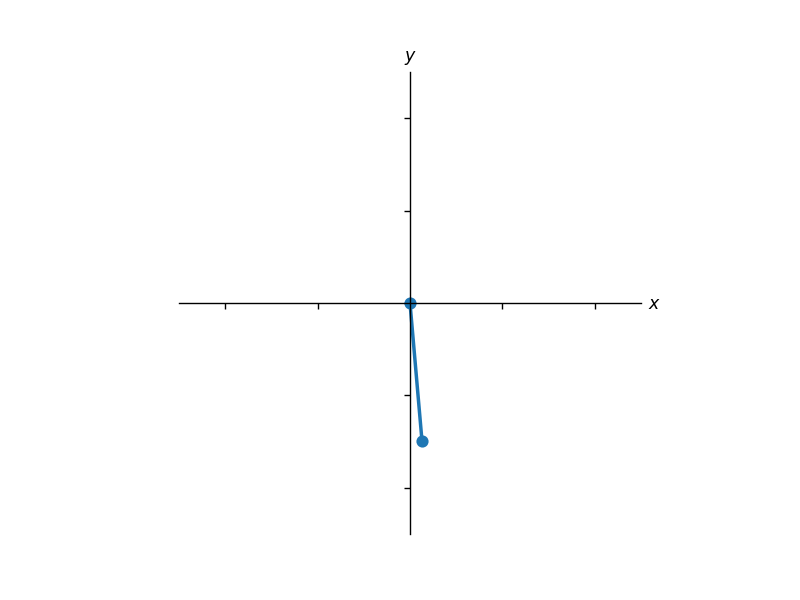

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-5, 5), ylim=(-5, 5))
ax.set_aspect('equal')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# No ticklabels
ax.set_yticklabels([])
ax.set_xticklabels([])

line, = ax.plot([], [], 'o-', lw=2)
def init():
    line.set_data([], [])
    return line


def animate(i):
    thisx = [0, x[i]]
    thisy = [0, y[i]]

    line.set_data(thisx, thisy)
    return line

xlbl = ax.set_xlabel(r'$x$')
ax.xaxis.set_label_coords(1.03, 0.518)


ylbl = ax.set_ylabel(r'$y$')
ylbl.set_rotation(0)
ax.yaxis.set_label_coords(0.5, 1.01)

ani = animation.FuncAnimation(fig, 
                              animate, 
                              range(0, len(y)),
                              interval=100,
                              init_func=init)


In [6]:
ani.save('images and animations/simple pendulum.mp4', dpi=200)

# Driven Pendulum

The equation of motion for the pendulum with a small oscillating force is
\
\
    $$\frac{d^2 \theta}{dt^2} = - \frac{g}{l} \sin \theta + C \cos \theta \sin \Omega t$$
\
where $C$ and $\Omega$ are constants.

<IPython.core.display.Javascript object>


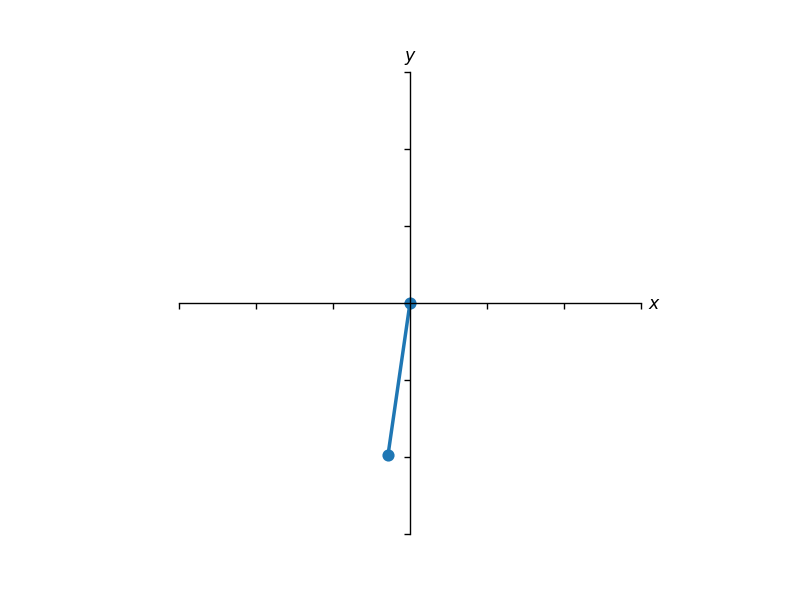

In [7]:
g = 9.8
l = 10
C = 2
Ω = 5

def f(r, t):
    theta = r[0]
    phi = r[1]
    
    ftheta = phi
    fphi = - (g / l) * np.sin(theta) + C*np.cos(theta) * np.sin(Ω * t)
    
    return np.array([ftheta, fphi])

tmin = 0
tmax = 60
N = 600
t = np.linspace(tmin, tmax, N)

r0 = [0, 0] # [initial angle, initial velocity]
r = rk4_simultaneous(f, r0, t)

# Going back to Cartesian coordinates
x = l * np.cos(r[0])
y = l * np.sin(r[0])

# Rotate
x, y = rotation(x, y, theta=3*np.pi/2)
 

# Animate
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-15, 15), ylim=(-15, 15))
ax.set_aspect('equal')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# No ticklabels
ax.set_yticklabels([])
ax.set_xticklabels([])


line, = ax.plot([], [], 'o-', lw=2)
def init():
    line.set_data([], [])
    return line


def animate(i):
    thisx = [0, x[i]]
    thisy = [0, y[i]]

    line.set_data(thisx, thisy)
    return line

xlbl = ax.set_xlabel(r'$x$')
ax.xaxis.set_label_coords(1.03, 0.518)


ylbl = ax.set_ylabel(r'$y$')
ylbl.set_rotation(0)
ax.yaxis.set_label_coords(0.5, 1.01)

ani = animation.FuncAnimation(fig, 
                              animate, 
                              range(0, len(y)),
                              interval=100,
                              init_func=init)

In [8]:
ani.save('images and animations/driven pendulum.mp4', dpi=200)

# Higher-order ordinary differential equations

Suppose we have the equation
    $$\frac{d^3 x}{d t^3} = f \left(x, \frac{dx}{dt}, \frac{d^2x}{dt^2}, t\right)$$
\
\
We define 
\
\
    $$\frac{dx}{dt} = y\\ 
    \frac{dy}{dt} = z$$
\
\
So that
    $$\frac{dz}{dt} = f(x,y,z,t)$$
\
\
We must solve these three equations.